In [6]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.layers import GlobalMaxPool2D, Input
from keras.models import Model
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.preprocessing import image
import os
from numpy.linalg import norm
from keras.models import Sequential

In [7]:
filenames = []
for file in os.listdir(r'C:\Users\hp\Downloads\archive\images'):
    filenames.append(os.path.join(r'C:\Users\hp\Downloads\archive\images',file))

len(filenames)

44441

In [8]:
input_tensor = Input(shape=(224, 224, 3))

model= ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
model.trainable=False
x = model.output
x = GlobalMaxPool2D()(x)
model = Model(inputs=model.input, outputs=x)


# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
img = image.load_img(r'C:\Users\hp\Downloads\archive\images\15047.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([0.00338397, 0.07491598, 0.02075403, ..., 0.        , 0.04040217,
       0.01932103], dtype=float32)

In [10]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [11]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
       0.06899219], dtype=float32)

In [12]:
image_features = []
for file in filenames[0:5]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


[array([0.        , 0.01761619, 0.00171607, ..., 0.01247238, 0.027264  ,
        0.06899219], dtype=float32),
 array([0.        , 0.03648943, 0.        , ..., 0.00997913, 0.02375534,
        0.04649905], dtype=float32),
 array([0.        , 0.03642146, 0.00710437, ..., 0.00140771, 0.        ,
        0.05435037], dtype=float32),
 array([0.00232166, 0.0503055 , 0.00747742, ..., 0.00346686, 0.03391019,
        0.04565743], dtype=float32),
 array([0.00306835, 0.06240452, 0.        , ..., 0.00170624, 0.02032885,
        0.05833261], dtype=float32)]

In [14]:

with open('Images_features.pkl', 'wb') as f:
    pkl.dump(image_features, f)

with open('filenames.pkl', 'wb') as f:
    pkl.dump(filenames, f)

# Load features and filenames
with open('Images_features.pkl', 'rb') as f:
    Image_features = pkl.load(f)

with open('filenames.pkl', 'rb') as f:
    filenames = pkl.load(f)


print(f"Shape of Image_features: {np.array(Image_features).shape}")


Shape of Image_features: (5, 2048)


In [16]:
n_neighbors = min(len(Image_features), 6)
neighbors = NearestNeighbors(n_neighbors=n_neighbors, algorithm='brute', metric='euclidean')
neighbors.fit(Image_features)
input_image_path = r'C:\Users\hp\Downloads\archive\images\15047.jpg'
input_image = extract_features_from_images(input_image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [17]:

distances, indices = neighbors.kneighbors([input_image])
print("Distances:", distances)
print("Indices:", indices)

# Print the corresponding filenames for the nearest neighbors
for i in range(n_neighbors):
    print(f"Neighbor {i}:")
    print(f"Distance: {distances[0][i]}")
    print(f"Filename: {filenames[indices[0][i]]}")

Distances: [[0.84633875 0.84920156 0.95095879 0.96952283 0.97518766]]
Indices: [[4 3 2 0 1]]
Neighbor 0:
Distance: 0.8463387489318848
Filename: C:\Users\hp\Downloads\archive\images\10004.jpg
Neighbor 1:
Distance: 0.8492015600204468
Filename: C:\Users\hp\Downloads\archive\images\10003.jpg
Neighbor 2:
Distance: 0.950958788394928
Filename: C:\Users\hp\Downloads\archive\images\10002.jpg
Neighbor 3:
Distance: 0.9695228338241577
Filename: C:\Users\hp\Downloads\archive\images\10000.jpg
Neighbor 4:
Distance: 0.9751876592636108
Filename: C:\Users\hp\Downloads\archive\images\10001.jpg


C:\Users\hp\Downloads\archive\images\10000.jpg
C:\Users\hp\Downloads\archive\images\10001.jpg
C:\Users\hp\Downloads\archive\images\10002.jpg
C:\Users\hp\Downloads\archive\images\10003.jpg
C:\Users\hp\Downloads\archive\images\10004.jpg
C:\Users\hp\Downloads\archive\images\10005.jpg
C:\Users\hp\Downloads\archive\images\10006.jpg
C:\Users\hp\Downloads\archive\images\10007.jpg
C:\Users\hp\Downloads\archive\images\10008.jpg
C:\Users\hp\Downloads\archive\images\10009.jpg
C:\Users\hp\Downloads\archive\images\10010.jpg
C:\Users\hp\Downloads\archive\images\10011.jpg
C:\Users\hp\Downloads\archive\images\10012.jpg
C:\Users\hp\Downloads\archive\images\10013.jpg
C:\Users\hp\Downloads\archive\images\10014.jpg
C:\Users\hp\Downloads\archive\images\10015.jpg
C:\Users\hp\Downloads\archive\images\10016.jpg
C:\Users\hp\Downloads\archive\images\10017.jpg
C:\Users\hp\Downloads\archive\images\10018.jpg
C:\Users\hp\Downloads\archive\images\10019.jpg
C:\Users\hp\Downloads\archive\images\10020.jpg
C:\Users\hp\D

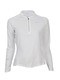

In [38]:
import os
from IPython.display import Image as IPImage, display

# Load filenames and convert to absolute paths
image_dir = r'C:\Users\hp\Downloads\archive\images'
filenames = [os.path.abspath(os.path.join(image_dir, file)) for file in os.listdir(image_dir)]

# Print all paths to ensure they are correct
for path in filenames:
    print(path)

# Get the path of the image for the nearest neighbor
neighbor_image_path = filenames[indices[0][1]]

# Print path for debugging
print(f"Path to neighbor image: {neighbor_image_path}")

# Check if file exists
if os.path.isfile(neighbor_image_path):
    # Display the image
    display(IPImage(filename=neighbor_image_path))
else:
    print(f"File not found: {neighbor_image_path}")




# # from IPython.display import Image as IPImage, display
# from IPython.display import Image as IPImage, display
# import os

# # Ensure indices and filenames are defined and valid
# if len(indices[0]) > 2:  # Check that index 2 is within bounds
#     neighbor_image_path = filenames[indices[0][2]]  # Use index 2 or any valid index within bounds
    
#     # Convert relative path to absolute path if necessary
#     if not os.path.isabs(neighbor_image_path):
#         neighbor_image_path = os.path.abspath(neighbor_image_path)
    
#     # Check if the file exists before attempting to display it
#     if os.path.isfile(neighbor_image_path):
#         display(IPImage(filename=neighbor_image_path))
#     else:
#         print(f"File not found: {neighbor_image_path}")
# else:
#     print("Index 2 out of bounds for neighbors.")


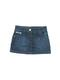

In [39]:
IPImage(filenames[indices[0][2]])

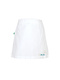

In [40]:
IPImage(filenames[indices[0][3]])

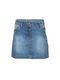

In [41]:
IPImage(filenames[indices[0][4]])